In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import norm
import seaborn as sns


/var/folders/mv/8_77q4lx4slf_z8r0xl7hd4c0000gn/T/ipykernel_82146/3690803472.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading csv file
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

#dropping columns
df = df.drop(columns=['Geography Type'])

#filtering DF again to keep only rows where Dimension Type = 'Age' 
df = df[df['Dimension Type'] == 'Age']

#sorting by vaccine type (column is named 'Vaccine')
df_sorted = df.sort_values (by='Vaccine')

#Displaying the sorted DataFrame
df_sorted

df


,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...
128183,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [3]:
# Defining a dictionary to map each state to respective region
#expanding from original 4 regions to 9 regions: 
    #Pacific West, Mountain West, West North Central, East North Central, East South Central 
    # West South Central, South Atlantic, Middle Atlantic, New England
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'NY-Rest of state': 'Middle Atlantic', 'NY-City of New York': 'Middle Atlantic', 
    'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic', 
    'PA-Philadelphia': 'Middle Atlantic', 'PA-Rest of state': 'Middle Atlantic',

    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',

    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan':'East North Central', 'Ohio': 'East North Central', 
    'Wisconsin': 'East North Central', 'IL-City of Chicago': 'East North Central', 
    'IL-Rest of state': 'East North Central',

    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 'North Dakota': 'West North Central', 
    'South Dakota': 'West North Central',

    #South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic', 
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 'South Carolina': 'South Atlantic',
    'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',

    #East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central', 'Mississippi': 'East South Central', 
    'Tennessee': 'East South Central', 

    #West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central', 
    'Texas': 'West South Central', 'TX-City of Houston': 'West South Central', 'TX-Rest of state': 'West South Central',
    'TX-Dallas County': 'West South Central', 'TX-Bexar County':'West South Central', 'TX-El Paso County': 'West South Central',
    'TX-Hidalgo County': 'West South Central', 'TX-Tarrant County':'West South Central',

    #Mountain 
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho':'Mountain', 'New Mexico':'Mountain', 
    'Montana': 'Mountain', 'Utah':'Mountain', 'Nevada': 'Mountain', 'Wyoming': 'Mountain',

    #Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 'Oregon': 'Pacific',
    'Washington': 'Pacific'
}

# Mapping each state in the 'Geography' column to its region
df['Region'] = df['Geography'].map(state_to_region)

# Reordering columns so that 'Region' appears first
df = df[['Region'] + [col for col in df.columns if col != 'Region']]

# Display the updated DataFrame
df



,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,West North Central,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,West North Central,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,West North Central,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,West North Central,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,West North Central,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...,...
128183,New England,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,New England,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,New England,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,New England,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [6]:
# Filter the DataFrame to only include rows where:
# - 'Vaccine' is 'DTaP' and 'MMR'
# - 'Birth Cohort' is '2020-2021'
# - 'Age Group' includes 19 months, 24 months, and 35 months: all ages where it can be safely assumed that individual 
#   is not age-restricted from receiving most up-to-date dosages of each vaccine (4 doses for DTaP, 1 dose for MMR)

# Create df_filtered based on conditions above
df_filtered = df[
    (df['Vaccine'].isin(['DTaP','≥1 Dose MMR'])) &
    (df['Birth Year/Birth Cohort'].isin(['2020-2021', '2020', '2021'])) &
 
   (df['Dimension'].isin(['19 Months','24 Months','35 Months'])) &
   (
        ((df['Vaccine'] == 'DTaP') & (df['Dose'] == '≥4 Doses')) | 
        (df['Vaccine'] == '≥1 Dose MMR')
    )
]

# Rename the column 'Estimate (%)' to 'Estimated Percentage' in df_filtered
df_filtered = df_filtered.rename(columns={'Estimate (%)': 'Estimated_Percentage'})

# Exclude rows where 'Region' , 'Percentage', 'Vaccine' is NaN
df_filtered = df_filtered.dropna(subset=['Region', 'Vaccine', 'Estimated_Percentage'])


df_filtered


,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimated_Percentage,95% CI (%),Sample Size
11,West North Central,≥1 Dose MMR,NaN,North Dakota,2021,Age,19 Months,79.9,69.5 to 87.3,143.0
23,West North Central,DTaP,≥4 Doses,North Dakota,2021,Age,35 Months,77.2,67.0 to 86.1,143.0
44,West North Central,≥1 Dose MMR,NaN,North Dakota,2020-2021,Age,35 Months,91.0,85.0 to 95.2,391.0
51,West North Central,DTaP,≥4 Doses,North Dakota,2020-2021,Age,19 Months,68.8,61.8 to 75.1,391.0
65,West North Central,≥1 Dose MMR,NaN,North Dakota,2020-2021,Age,19 Months,83.8,77.6 to 88.5,391.0
...,...,...,...,...,...,...,...,...,...,...
127971,New England,≥1 Dose MMR,NaN,New Hampshire,2020,Age,19 Months,94.4,88.3 to 97.4,189.0
128165,New England,DTaP,≥4 Doses,New Hampshire,2021,Age,24 Months,89.1,80.1 to 95.2,126.0
128168,New England,≥1 Dose MMR,NaN,New Hampshire,2021,Age,24 Months,96.6,93.2 to 98.6,126.0
128172,New England,DTaP,≥4 Doses,New Hampshire,2020-2021,Age,35 Months,94.6,91.2 to 97.1,315.0


In [7]:
# Calculate the mean MMR uptake percentage by region
region_mmr_data = df_filtered[df_filtered['Vaccine'] == '≥1 Dose MMR'].groupby('Region')['Estimated_Percentage'].mean().reset_index()

# Display the aggregated data
region_mmr_data


,Region,Estimated_Percentage
0,East North Central,91.271429
1,East South Central,89.138889
2,Middle Atlantic,89.290476
3,Mountain,87.741667
4,New England,94.979630
5,Pacific,88.093333
6,South Atlantic,89.745679
7,West North Central,90.906349
8,West South Central,89.573016


In [14]:
# Import GeoPandas
import geopandas as gpd

# Load the shapefile
shapefile_path = "shapefiles/cb_2018_us_state_500k.shp"
regions_shapefile = gpd.read_file(shapefile_path)



AttributeError: module 'fiona' has no attribute 'path'

In [10]:
# Add Census Region information to the GeoDataFrame
regions_shapefile['Census Region'] = regions_shapefile['NAME'].map(state_to_region).fillna('Unknown')

# Filter out rows with 'Unknown' regions
regions_shapefile = regions_shapefile[regions_shapefile['Census Region'] != 'Unknown']

# Dissolve states into Census Regions (aggregates by region)
regions_shapefile = regions_shapefile.dissolve(by='Census Region')


NameError: name 'regions_shapefile' is not defined

In [105]:
# Merge the regional shapefile with vaccination uptake data
choropleth_data = regions_shapefile.merge(region_mmr_data, left_on='Census Region', right_on='Region')


In [106]:
# Display the first few rows of the merged data
print(choropleth_data.head())


                                            geometry STATEFP   STATENS  \
0  MULTIPOLYGON (((-91.50727 40.20934, -91.50695 ...      26  01779789   
1  MULTIPOLYGON (((-88.44913 30.20167, -88.44265 ...      28  01779790   
2  MULTIPOLYGON (((-80.51904 40.95873, -80.519 40...      42  01779798   
3  POLYGON ((-103.00196 36.90957, -103.00214 36.7...      16  01779783   
4  MULTIPOLYGON (((-73.62513 40.98121, -73.62681 ...      25  00606926   

      AFFGEOID GEOID STUSPS           NAME LSAD         ALAND        AWATER  \
0  0400000US26    26     MI       Michigan   00  146600952990  103885855702   
1  0400000US28    28     MS    Mississippi   00  121533519481    3926919758   
2  0400000US42    42     PA   Pennsylvania   00  115884442321    3394589990   
3  0400000US16    16     ID          Idaho   00  214049787659    2391722557   
4  0400000US25    25     MA  Massachusetts   00   20205125364    7129925486   

               Region  Estimated_Percentage  
0  East North Central             

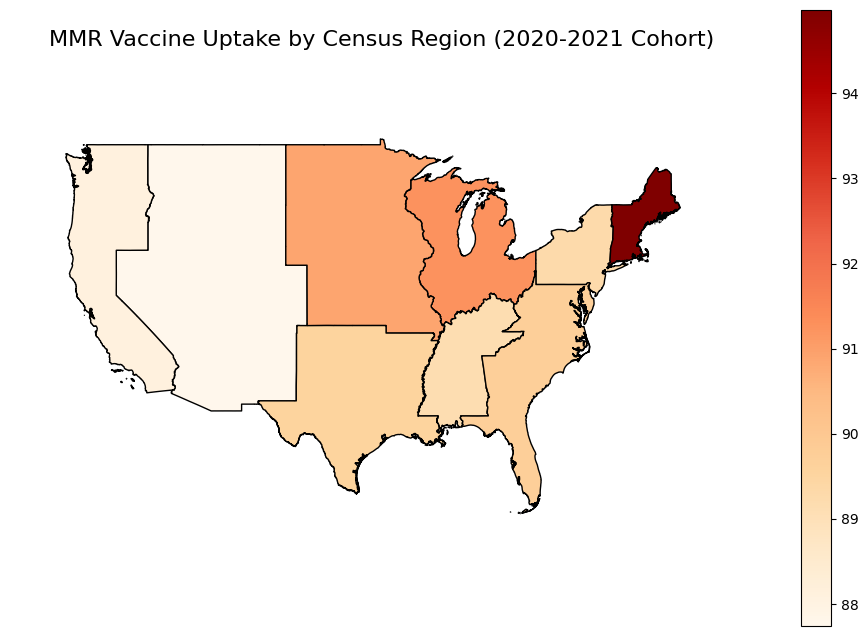

In [107]:
import matplotlib.pyplot as plt

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
choropleth_data.plot(
    column='Estimated_Percentage',  # Column for color mapping
    cmap='OrRd',                   # Colormap
    legend=True,                   # Show the legend
    edgecolor='black',         # Black outline for regions
    ax=ax,                         # Axes to plot on
    missing_kwds={
        "color": "lightgrey",      # Color for missing data
        "label": "No data"         # Label for missing data
    }
)

# Add a title
ax.set_title('MMR Vaccine Uptake by Census Region (2020-2021 Cohort)', fontsize=16)

# Remove axes for cleaner look
ax.axis('off')

ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])



# Show the plot
plt.show()


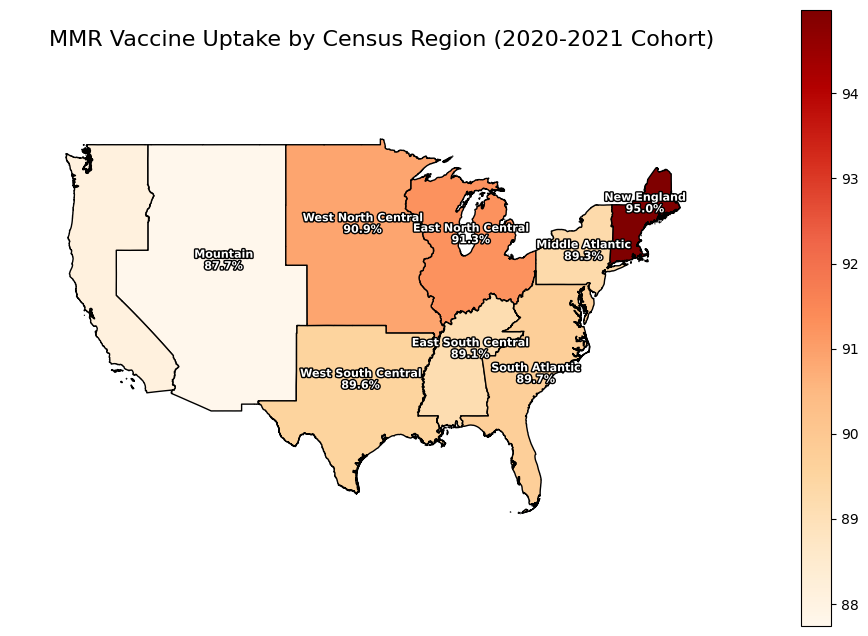

In [108]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
choropleth_data.plot(
    column='Estimated_Percentage',  # Column for color mapping
    cmap='OrRd',                   # Colormap
    legend=True,                   # Show the legend
    ax=ax,                         # Axes to plot on
    edgecolor='black',             # Black outlines for all regions
    missing_kwds={
        "color": "lightgrey",      # Color for missing data
        "label": "No data"         # Label for missing data
    }
)

# Add labels for each region with name and percentage
for idx, row in choropleth_data.iterrows():
    # Get the centroid of each region for label placement
    centroid = row['geometry'].centroid
    label = f"{row['Region']}\n{row['Estimated_Percentage']:.1f}%"
    
    # Adjust label positions for specific regions
    if row['Region'] == 'South Atlantic':
        xytext = (3, -10)  # Move downward for South Atlantic
    elif row['Region'] == 'Middle Atlantic':
        xytext = (3, -5)   # Move slightly downward for Middle Atlantic
    else:
        xytext = (3, 3)    # Default offset for other regions

    ax.annotate(
        text=label,
        xy=(centroid.x, centroid.y),  # Position (centroid of the region)
        xytext=xytext,                # Offset for better visibility
        textcoords='offset points',
        fontsize=8,                   # Slightly smaller font size
        ha='center',                  # Horizontal alignment
        fontweight='bold',            # Bold font
        color='white',                # White text for contrast
        path_effects=[                # Add black edge to text
            withStroke(linewidth=2, foreground='black')
        ]
    )

# Add a title
ax.set_title('MMR Vaccine Uptake by Census Region (2020-2021 Cohort)', fontsize=16)

# Remove axes for cleaner look
ax.axis('off')

# Set zoom level for the map
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])

# Show the plot
plt.show()


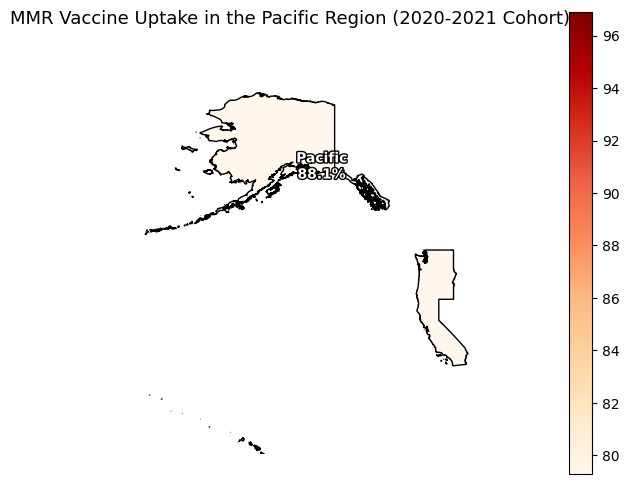

In [109]:
# Create the Pacific region map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
pacific_data.plot(
    column='Estimated_Percentage',  # Column for color mapping
    cmap='OrRd',                   # Colormap
    legend=True,                   # Show the legend
    ax=ax,                         # Axes to plot on
    edgecolor='black',             # Black outlines for the regions
    missing_kwds={
        "color": "lightgrey",      # Color for missing data
        "label": "No data"         # Label for missing data
    }
)

# Add labels for the Pacific region
for idx, row in pacific_data.iterrows():
    centroid = row['geometry'].centroid
    label = f"{row['Region']}\n{row['Estimated_Percentage']:.1f}%"
    ax.annotate(
        text=label,
        xy=(centroid.x, centroid.y),
        xytext=(3, 3),
        textcoords='offset points',
        fontsize=10,
        ha='center',
        fontweight='bold',
        color='white',
        path_effects=[
            withStroke(linewidth=2, foreground='black')
        ]
    )

# Zoom into the Pacific region by setting xlim and ylim
ax.set_xlim([-200, -100])  # Adjust these values to better fit the Pacific region
ax.set_ylim([20, 80])      # Adjust these values to better fit the Pacific region

# Add a title
ax.set_title('MMR Vaccine Uptake in the Pacific Region (2020-2021 Cohort)', fontsize=13)

# Remove axes for cleaner look
ax.axis('off')

# Show the plot
plt.show()


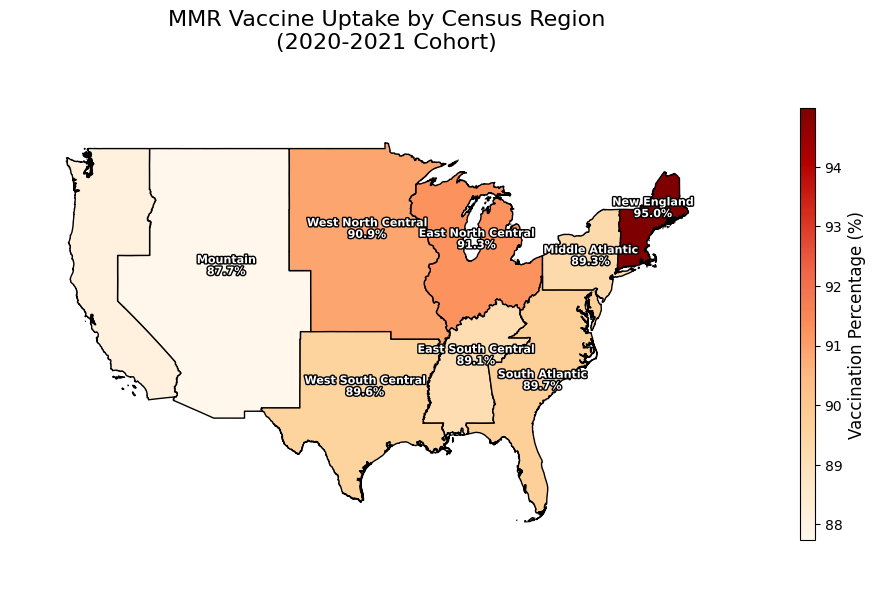

In [121]:
import matplotlib as mpl
from matplotlib.patheffects import withStroke

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot = choropleth_data.plot(
    column='Estimated_Percentage',  # Column for color mapping
    cmap='OrRd',                   # Colormap
    legend=False,                  # Disable the default legend
    ax=ax,                         # Axes to plot on
    edgecolor='black',             # Black outlines for all regions
    missing_kwds={
        "color": "lightgrey",      # Color for missing data
        "label": "No data"         # Label for missing data
    }
)

# Create a ScalarMappable object for the color bar
sm = mpl.cm.ScalarMappable(
    cmap='OrRd',  # Color map
    norm=mpl.colors.Normalize(
        vmin=choropleth_data['Estimated_Percentage'].min(),  # Minimum value for the color scale
        vmax=choropleth_data['Estimated_Percentage'].max()   # Maximum value for the color scale
    )
)
sm._A = []  # Required to make ScalarMappable work without actual data

# Add the color bar to the figure
colorbar = fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.04, aspect=30)  # Adjust the size and position of the color bar
colorbar.set_label('Vaccination Percentage (%)', fontsize=12)  # Add a label to the color bar
colorbar.ax.tick_params(labelsize=10)  # Adjust tick label size

# Add labels for each region with name and percentage
for idx, row in choropleth_data.iterrows():
    centroid = row['geometry'].centroid
    label = f"{row['Region']}\n{row['Estimated_Percentage']:.1f}%"
    
    # Adjust label positions for specific regions
    if row['Region'] == 'South Atlantic':
        xytext = (3, -10)  # Move downward for South Atlantic
    elif row['Region'] == 'Middle Atlantic':
        xytext = (3, -5)   # Move slightly downward for Middle Atlantic
    else:
        xytext = (3, 3)    # Default offset for other regions

    ax.annotate(
        text=label,
        xy=(centroid.x, centroid.y),  # Position (centroid of the region)
        xytext=xytext,                # Offset for better visibility
        textcoords='offset points',
        fontsize=8,                   # Slightly smaller font size
        ha='center',                  # Horizontal alignment
        fontweight='bold',            # Bold font
        color='white',                # White text for contrast
        path_effects=[                # Add black edge to text
            withStroke(linewidth=2, foreground='black')
        ]
    )

# Add a title
ax.set_title('MMR Vaccine Uptake by Census Region\n(2020-2021 Cohort)', fontsize=16)

# Remove axes for cleaner look
ax.axis('off')

# Adjust the zoom level for the map
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])

# Show the plot
plt.show()


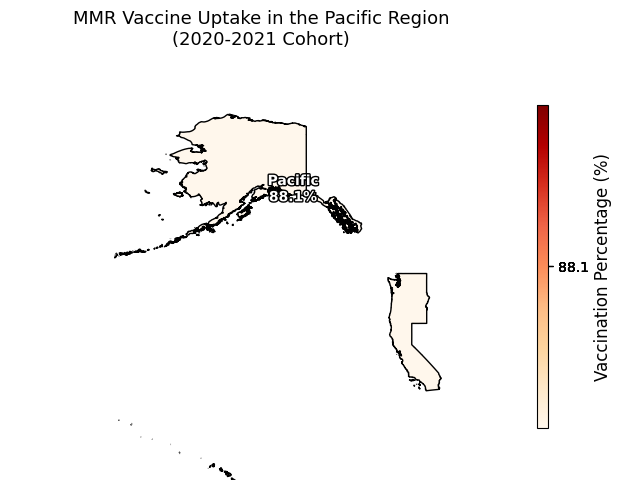

In [122]:
import matplotlib as mpl
import numpy as np
from matplotlib.patheffects import withStroke

# Create the Pacific region map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
pacific_plot = pacific_data.plot(
    column='Estimated_Percentage',  # Column for color mapping
    cmap='OrRd',                   # Colormap
    legend=False,                  # Disable the default legend
    ax=ax,                         # Axes to plot on
    edgecolor='black',             # Black outlines for the regions
    missing_kwds={
        "color": "lightgrey",      # Color for missing data
        "label": "No data"         # Label for missing data
    }
)

# Create a ScalarMappable object for the color bar
sm = mpl.cm.ScalarMappable(
    cmap='OrRd',  # Color map
    norm=mpl.colors.Normalize(
        vmin=pacific_data['Estimated_Percentage'].min(),  # Minimum value for the color scale
        vmax=pacific_data['Estimated_Percentage'].max()   # Maximum value for the color scale
    )
)
sm._A = []  # Required to make ScalarMappable work without actual data

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.04, aspect=30)  # Adjust the size and position of the color bar
cbar.set_label('Vaccination Percentage (%)', fontsize=12)  # Add a label to the color bar
ticks = np.linspace(pacific_data['Estimated_Percentage'].min(), pacific_data['Estimated_Percentage'].max(), 5)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size

# Add labels for the Pacific region
for idx, row in pacific_data.iterrows():
    centroid = row['geometry'].centroid
    label = f"{row['Region']}\n{row['Estimated_Percentage']:.1f}%"
    ax.annotate(
        text=label,
        xy=(centroid.x, centroid.y),
        xytext=(3, 3),
        textcoords='offset points',
        fontsize=10,
        ha='center',
        fontweight='bold',
        color='white',
        path_effects=[
            withStroke(linewidth=2, foreground='black')
        ]
    )

# Zoom into the Pacific region by setting xlim and ylim
ax.set_xlim([-200, -100])  # Adjust these values to better fit the Pacific region
ax.set_ylim([20, 80])      # Adjust these values to better fit the Pacific region

# Add a title
ax.set_title('MMR Vaccine Uptake in the Pacific Region\n(2020-2021 Cohort)', fontsize=13)

# Remove axes for cleaner look
ax.axis('off')

# Show the plot
plt.show()
